<a href="https://colab.research.google.com/github/AaditiAI/aiml_projects/blob/main/feedforward_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
 df=pd.read_csv("diabetes.csv")

In [ ]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Printing a data frame in which the outcome is 1

In [ ]:
df[df['Outcome']==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


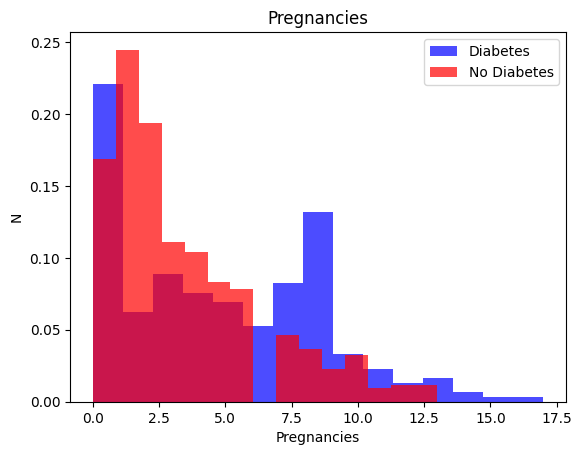

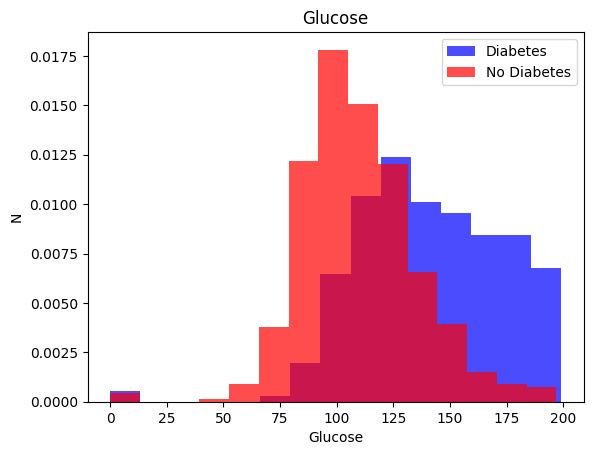

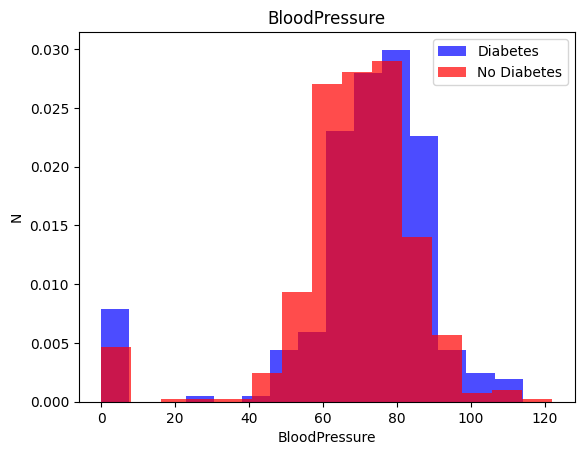

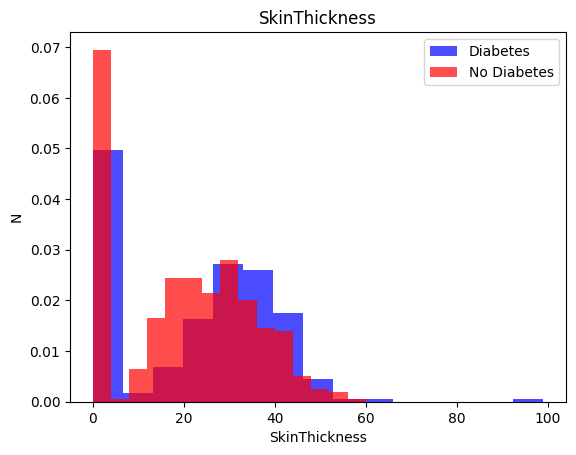

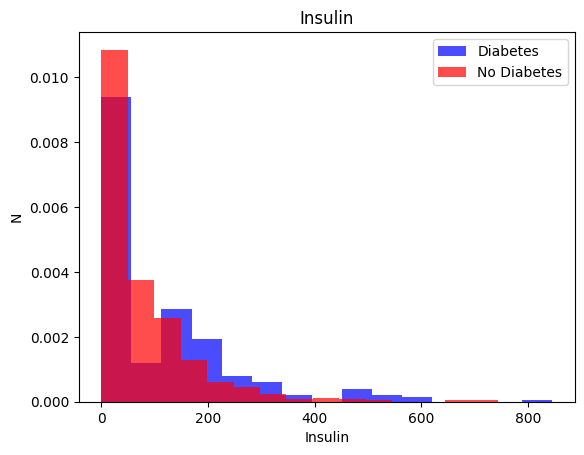

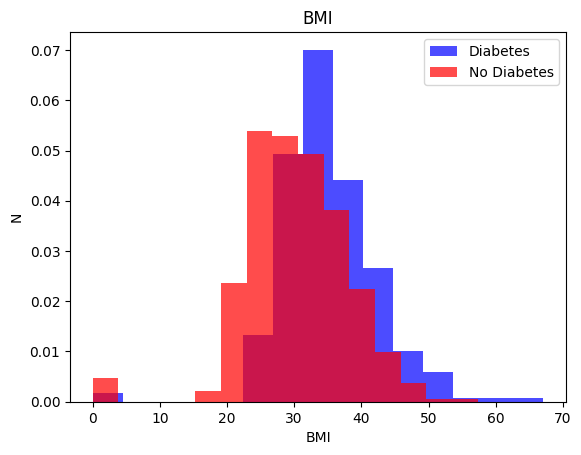

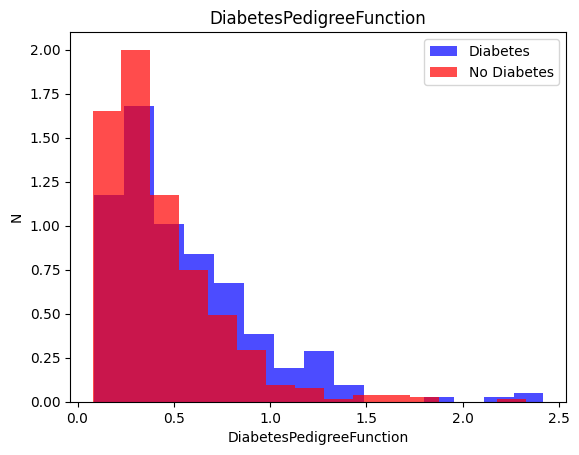

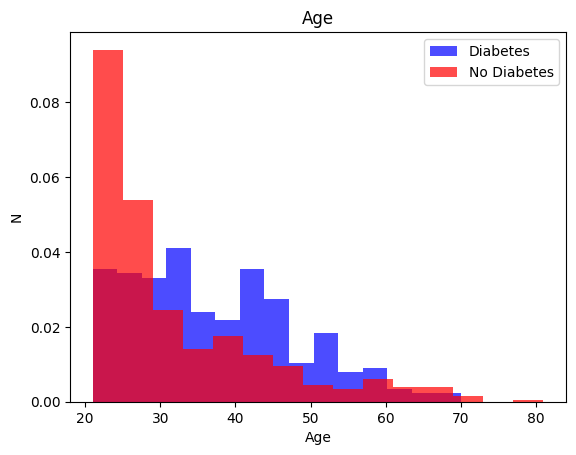

In [ ]:
for i in range(len(df.columns[:-1])):
  label=df.columns[i]
  plt.hist(df[df['Outcome']==1][label],color='blue',label="Diabetes",alpha=0.7,density=True,bins=15)
  plt.hist(df[df['Outcome']==0][label],color='red',label="No Diabetes",alpha=0.7,density=True,bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend( )
  plt.show()


In [ ]:
len(df[df['Outcome']==1]),len(df[df['Outcome']==0])

(268, 500)

In [ ]:
x=df[df.columns[:-1]].values
y=df[df.columns[-1]].values
m=x.shape

In [ ]:
m

(768, 8)

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
data=np.hstack((x,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [ ]:
over=RandomOverSampler()
x,y=over.fit_resample(x,y)
data=np.hstack((x,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [ ]:
 X_train , X_temp,Y_train,Y_temp=train_test_split(x,y,test_size=0.4, random_state=0)

In [ ]:
 X_valid , X_test,Y_valid,Y_test =train_test_split(X_temp,Y_temp,test_size=0.5, random_state=0)

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Dense(16,activation='relu')])
model=tf.keras.Sequential([tf.keras.layers.Dense(16,activation='relu')])
model=tf.keras.Sequential([tf.keras.layers.Dense(1,activation='sigmoid')])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(X_train,Y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.7755 - accuracy: 0.5600


[0.775528073310852, 0.5600000023841858]

In [ ]:
model.evaluate(X_valid,Y_valid)

7/7 [==============================] - 0s 4ms/step - loss: 0.8007 - accuracy: 0.5600


[0.8007410168647766, 0.5600000023841858]

In [ ]:
model.fit(X_train,Y_train,batch_size=16,epochs=20,validation_data=(X_valid,Y_valid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.7681 - accuracy: 0.5667 - val_loss: 0.7819 - val_accuracy: 0.5650
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.7510 - accuracy: 0.5783 - val_loss: 0.7640 - val_accuracy: 0.5850
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.7353 - accuracy: 0.5933 - val_loss: 0.7467 - val_accuracy: 0.5900
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.7204 - accuracy: 0.5983 - val_loss: 0.7316 - val_accuracy: 0.6000
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.6067 - val_loss: 0.7163 - val_accuracy: 0.6000
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.6133 - val_loss: 0.7025 - val_accuracy: 0.6100
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.6167 - val_loss: 0.6898 - val_accuracy: 0.6100
Epoch 8/20
38/38 [==

In [ ]:
len(transformed_df[transformed_df["Outcome"]==1]),len(transformed_df[transformed_df["Outcome"]==0])


(500, 500)

In [ ]:
model.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.5284 - accuracy: 0.7350


[0.5284225344657898, 0.7350000143051147]

In [ ]:
example_data = np.array([[0.15, 0.7, 0.5, 0.4, 0.6, 0.3, 0.7, 0.2],])
predictions = model.predict(example_data)
print(predictions)
if predictions[0][0] > 0.5:
    print("The person is predicted to have diabetes.")
else:
    print("The person is predicted to not have diabetes.")

1/1 [==============================] - 0s 66ms/step
[[0.74475133]]
The person is predicted to have diabetes.
